Here we are going to explore various classification techniques using the Otto Group Product Challenge classification dataset.


> This dataset describes the 93 obfuscated details of more than 61,000 products grouped into 10 product categories (e.g. fashion, electronics, etc.). Input attributes are counts of different events of some kind. The goal is to make predictions for new products as an array of probabilities for each of the 10 categories and models are evaluated using multiclass logarithmic loss (also called cross entropy).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
sns.set_style('darkgrid')

# #Load and read dataset

In [2]:
train = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/train.csv')
train.head(10)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,0,0,0,2,0,0,0,6,0,0,2,0,0,0,5,0,0,0,0,1,0,0,2,0,0,0,2,0,0,0,1,0,0,0,0,0,0,2,2,0,0,0,0,0,3,0,0,0,0,0,5,0,1,0,1,4,2,6,0,2,4,2,0,0,1,0,2,0,4,3,0,0,0,0,1,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,1,0,3,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,0,0,1,7,0,0,0,1,0,0,2,0,0,0,7,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,6,0,0,0,0,1,2,2,0,0,0,0,1,0,2,0,0,0,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Class_1


In [3]:
test = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/test.csv')
test.head(10)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,0,0,0,2,0,4,0,4,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,1,0,4,0,2,3,0,0,0,0,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0
5,6,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,4,0,1,0,4,0,2,0,0,1,0,0,1,0,0,1,0,0,0,2,0,2,1,1,0,1,0,0,2,0,0,0,0,0,2,0,3,0,1,0,1,1,0,1,0,0,2,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,1,0,18,1,0,0
7,8,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0
8,9,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The following code cell shows that we have a class imbalance in the target column of the `train` dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

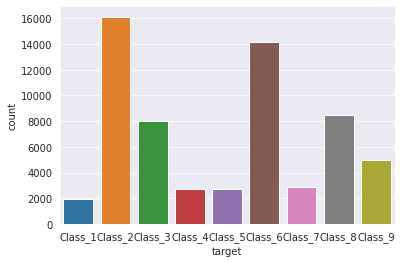

In [4]:
sns.countplot(x = train.target)

The following 3 code cells are due to [@nagamiso](https://www.kaggle.com/nagomiso/feature-extraction-tfidf).

In [5]:
class_to_order = dict()
order_to_class = dict()

for idx, col in enumerate(train.target.unique()):
    order_to_class[idx] = col
    class_to_order[col] = idx

train["target_ord"] = train["target"].map(class_to_order).astype("int16")
feature_columns = [col for col in train.columns if col.startswith("feat_")]
target_column = ["target_ord"]

In [6]:
order_to_class

{0: 'Class_1',
 1: 'Class_2',
 2: 'Class_3',
 3: 'Class_4',
 4: 'Class_5',
 5: 'Class_6',
 6: 'Class_7',
 7: 'Class_8',
 8: 'Class_9'}

In [7]:
class_to_order

{'Class_1': 0,
 'Class_2': 1,
 'Class_3': 2,
 'Class_4': 3,
 'Class_5': 4,
 'Class_6': 5,
 'Class_7': 6,
 'Class_8': 7,
 'Class_9': 8}

We are now going to see how each of the features are skewed. This would help us in further analysis.

In [8]:
from scipy.stats import skew

<AxesSubplot:>

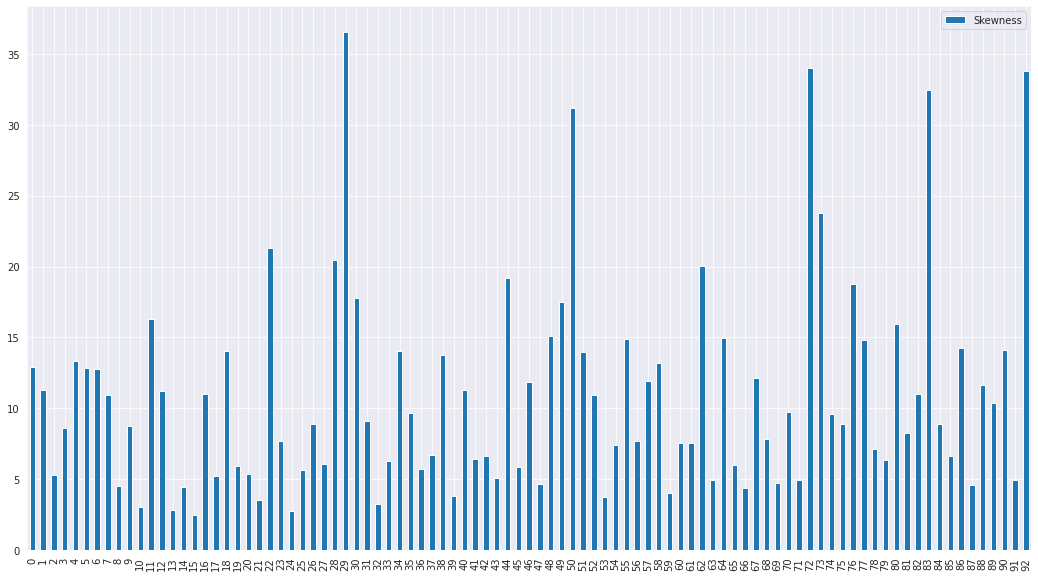

In [9]:
skew = []
for i in train[feature_columns].columns:
    skew.append(train[str(i)].skew())
    
skew_df = pd.DataFrame({'Feature': train[feature_columns].columns, 'Skewness': skew})
skew_df.plot(kind='bar',figsize=(18,10))

We are now going to apply the [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer) from scikit-learn. I first used `StandardScaler` but found that there was no change in the skew value of the features. 

If anyone knows why I didn't see any change, please drop a comment!
***

From the scikit-learn website:
> QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. In this case, all the data, including outliers, will be mapped to a uniform distribution with the range $[0, 1]$, making outliers indistinguishable from inliers.

> RobustScaler and QuantileTransformer are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation. But contrary to RobustScaler, QuantileTransformer will also automatically collapse any outlier by setting them to the a priori defined range boundaries (0 and 1). This can result in saturation artifacts for extreme values.

> To map to a Gaussian distribution, set the parameter `output_distribution='normal'`.

In [10]:
from sklearn.preprocessing import QuantileTransformer
train[feature_columns] = QuantileTransformer(copy=False, output_distribution='normal').fit_transform(train[feature_columns])
test[feature_columns] = QuantileTransformer(copy=False, output_distribution='normal').fit_transform(test[feature_columns])

Let us now check the skew values of the features.

<AxesSubplot:>

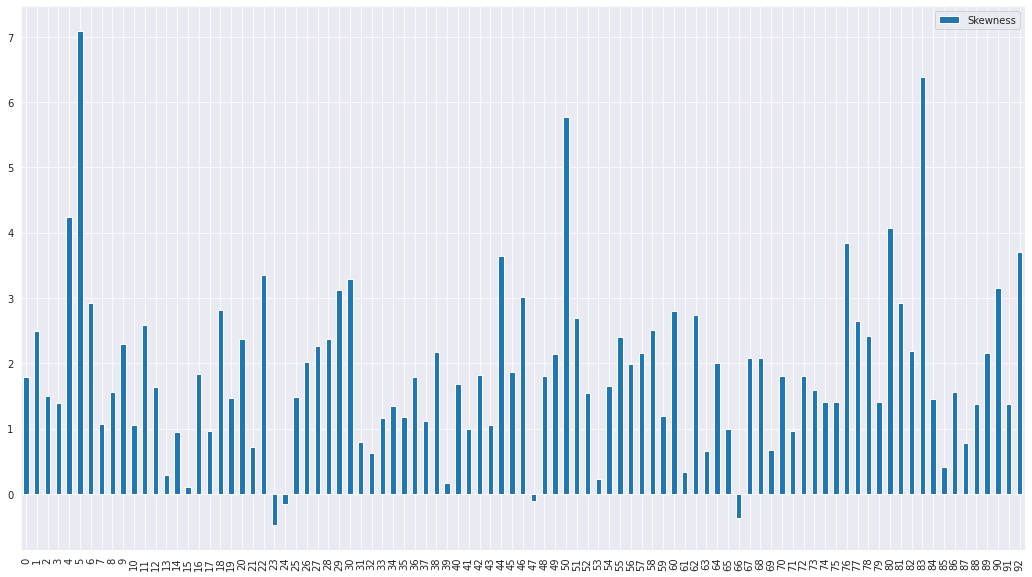

In [11]:
skew = []
for i in train[feature_columns].columns:
    skew.append(train[str(i)].skew())
    
skew_df = pd.DataFrame({'Feature': train[feature_columns].columns, 'Skewness': skew})
skew_df.plot(kind='bar',figsize=(18,10))

We are now going to remove the features that have a skew value > 3.75 (my arbitrary choice).

In [12]:
# check features for skew
skew_feats = train[feature_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness = skewness[abs(skewness) > 3.75].dropna()
skewed_features = skewness.index.values.tolist()
skewed_features

['feat_6', 'feat_84', 'feat_51', 'feat_5', 'feat_81', 'feat_77']

In [13]:
train_new = train.drop(skewed_features, axis = 1)
train_new

,id,feat_1,feat_2,feat_3,feat_4,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_78,feat_79,feat_80,feat_82,feat_83,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target,target_ord
0,1,1.174387,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.779924,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.644369,-5.199338,-5.199338,-5.199338,-5.199338,0.651824,-5.199338,0.833781,0.152391,1.004131,-5.199338,-5.199338,1.934489,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.983573,-5.199338,-5.199338,-5.199338,-5.199338,0.304482,-5.199338,1.865852,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.587964,-5.199338,-5.199338,-5.199338,-5.199338,0.287442,-5.199338,-5.199338,1.649237,-5.199338,-5.199338,1.780005,-5.199338,0.434861,1.541796,-5.199338,1.312981,-5.199338,1.199766,-5.199338,-5.199338,-5.199338,1.207532,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.721914,0.969427,-5.199338,-5.199338,1.027247,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Class_1,0
1,2,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.869846,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.310017,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.223287,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.266860,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.642543,-5.199338,-5.199338,-0.084155,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.615945,1.072973,-5.199338,0.997920,1.467860,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Class_1,0
2,3,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.869846,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.202347,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.644086,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.147316,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.157061,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.046576,-5.199338,-5.199338,1.027247,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Class_1,0
3,4,1.174387,-5.199338,-5.199338,0.959440,2.432017,-5.199338,-5.199338,1.355761,0.779924,-5.199338,1.128144,-5.199338,-5.199338,0.253606,1.202347,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.295363,0.636387,1.340200,-5.199338,-5.199338,-5.199338,3.365547,-5.199338,2.325972,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.634747,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.310017,-5.199338,1.404533,-5.199338,0.147316,1.664082,1.307063,-5.199338,-5.199338,0.803958,1.157061,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.926403,0.819656,0.888309,-5.199338,-5.199338,1.562721,-5.199338,-5.199338,1.61594

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X_train, X_valid, y_train, y_valid = train_test_split(
    train_new.drop(['id', 'target', 'target_ord'], axis = 1), 
    train_new[target_column],
    test_size = 0.275, 
    random_state = 7, 
    stratify = train_new[target_column]
)

## Using KNN

From the scikit-learn documentation:

> Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

> The $k$-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of $k$ is highly data-dependent: in general a larger $k$ suppresses the effects of noise, but makes the classification boundaries less distinct.

> The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, `weights = uniform`, assigns uniform weights to each neighbor. `weights = distance` assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knc = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')
knc.fit(X_train, y_train)
yhat = knc.predict(X_valid)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

> A confusion matrix $C$ is such that $C_{i, j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

In [18]:
result = confusion_matrix(y_valid, yhat)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 120   50    5    0   45   44    3  103  160]
 [   2 3891  461   11   36    9   10    8    6]
 [   0 1234  928   11    3    6    7   10    2]
 [   1  452  129  123   10   14    5    2    4]
 [   0   29    3    0  719    1    0    0    1]
 [  11  124   12    5   48 3514   21   72   80]
 [  11  195   95    1   33   59  320   55   12]
 [  14  113    8    0   54  152    7 1913   67]
 [   8  129    7    0   39   47    5   45 1083]]


The `classification_report` function builds a text report showing the main classification metrics.

$$\text{Precision} = \frac{\text{# of True positives}}{\text{# of True positives + # of False positives}}$$
$$\text{Recall} = \frac{\text{# of True positives}}{\text{# of True positives + # of False negatives}}$$
$$\text{f1-score} = \text{harmonic average of precision and recall} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}}$$
***
$$ \text{Accuracy} = \frac{\text{# of correct predictions}}{\text{Total number of predictions}}$$
$$\text{Macro average - obtained by averaging the unweighted mean per label}$$
$$\text{Weighted average - obtained by averaging the support-weighted mean per label}$$
***

In [19]:
result1 = classification_report(y_valid, yhat)
print("Classification Report:")
print(result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.23      0.34       530
           1       0.63      0.88      0.73      4434
           2       0.56      0.42      0.48      2201
           3       0.81      0.17      0.28       740
           4       0.73      0.95      0.83       753
           5       0.91      0.90      0.91      3887
           6       0.85      0.41      0.55       781
           7       0.87      0.82      0.84      2328
           8       0.77      0.79      0.78      1363

    accuracy                           0.74     17017
   macro avg       0.76      0.62      0.64     17017
weighted avg       0.75      0.74      0.72     17017



In [20]:
yhat_KNN = knc.predict_proba(X_valid)
logloss_KNN = log_loss(y_valid, yhat_KNN)
print('Log loss using KNN classifier:', logloss_KNN)

Log loss using KNN classifier: 1.2113082274705085


## Using DecisionTree

From the scikit-learn documentation:
> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8,
                              min_samples_leaf = 6, max_leaf_nodes = 40,
                              splitter = 'best')
dtree.fit(X_train, y_train)
yhat_tree = dtree.predict_proba(X_valid)
logloss_DTree = log_loss(y_valid, yhat_tree)
print('Log loss using Decision Tree: ', logloss_DTree)

Log loss using Decision Tree:  1.1548008856900502


[Text(280.4873161764706, 205.35999999999999, 'X[8] <= 1.218\nentropy = 2.814\nsamples = 44861\nvalue = [1399, 11688, 5803, 1951, 1986, 10248, 2058, 6136, 3592]'),
 Text(236.0216911764706, 181.2, 'X[56] <= 1.421\nentropy = 2.856\nsamples = 39911\nvalue = [1390, 11686, 5794, 1951, 1986, 5498, 2041, 5978, 3587]'),
 Text(186.47867647058825, 157.04, 'X[31] <= 1.643\nentropy = 2.809\nsamples = 36487\nvalue = [1347, 11679, 5794, 1923, 1986, 2344, 1978, 5919, 3517]'),
 Text(131.7044117647059, 132.88, 'X[11] <= 0.786\nentropy = 2.681\nsamples = 34299\nvalue = [1342, 11528, 5672, 1906, 161, 2336, 1954, 5904, 3496]'),
 Text(67.69852941176471, 108.72, 'X[12] <= 0.924\nentropy = 2.795\nsamples = 25141\nvalue = [1312, 6165, 3521, 1072, 159, 2242, 1634, 5747, 3289]'),
 Text(36.9264705882353, 84.56, 'X[83] <= 1.389\nentropy = 2.801\nsamples = 19552\nvalue = [1277, 3109, 2002, 587, 146, 2169, 1527, 5565, 3170]'),
 Text(19.694117647058825, 60.400000000000006, 'X[79] <= -2.357\nentropy = 2.883\nsamples =

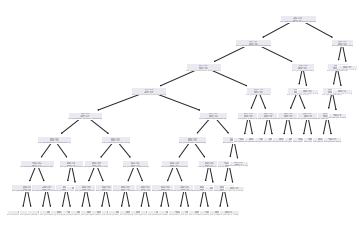

In [24]:
# Plot decision tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn import tree

tree.plot_tree(dtree)

Let us now export the tree in Graphviz format. Thanks to [@dmilla](https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset) for the code cell.

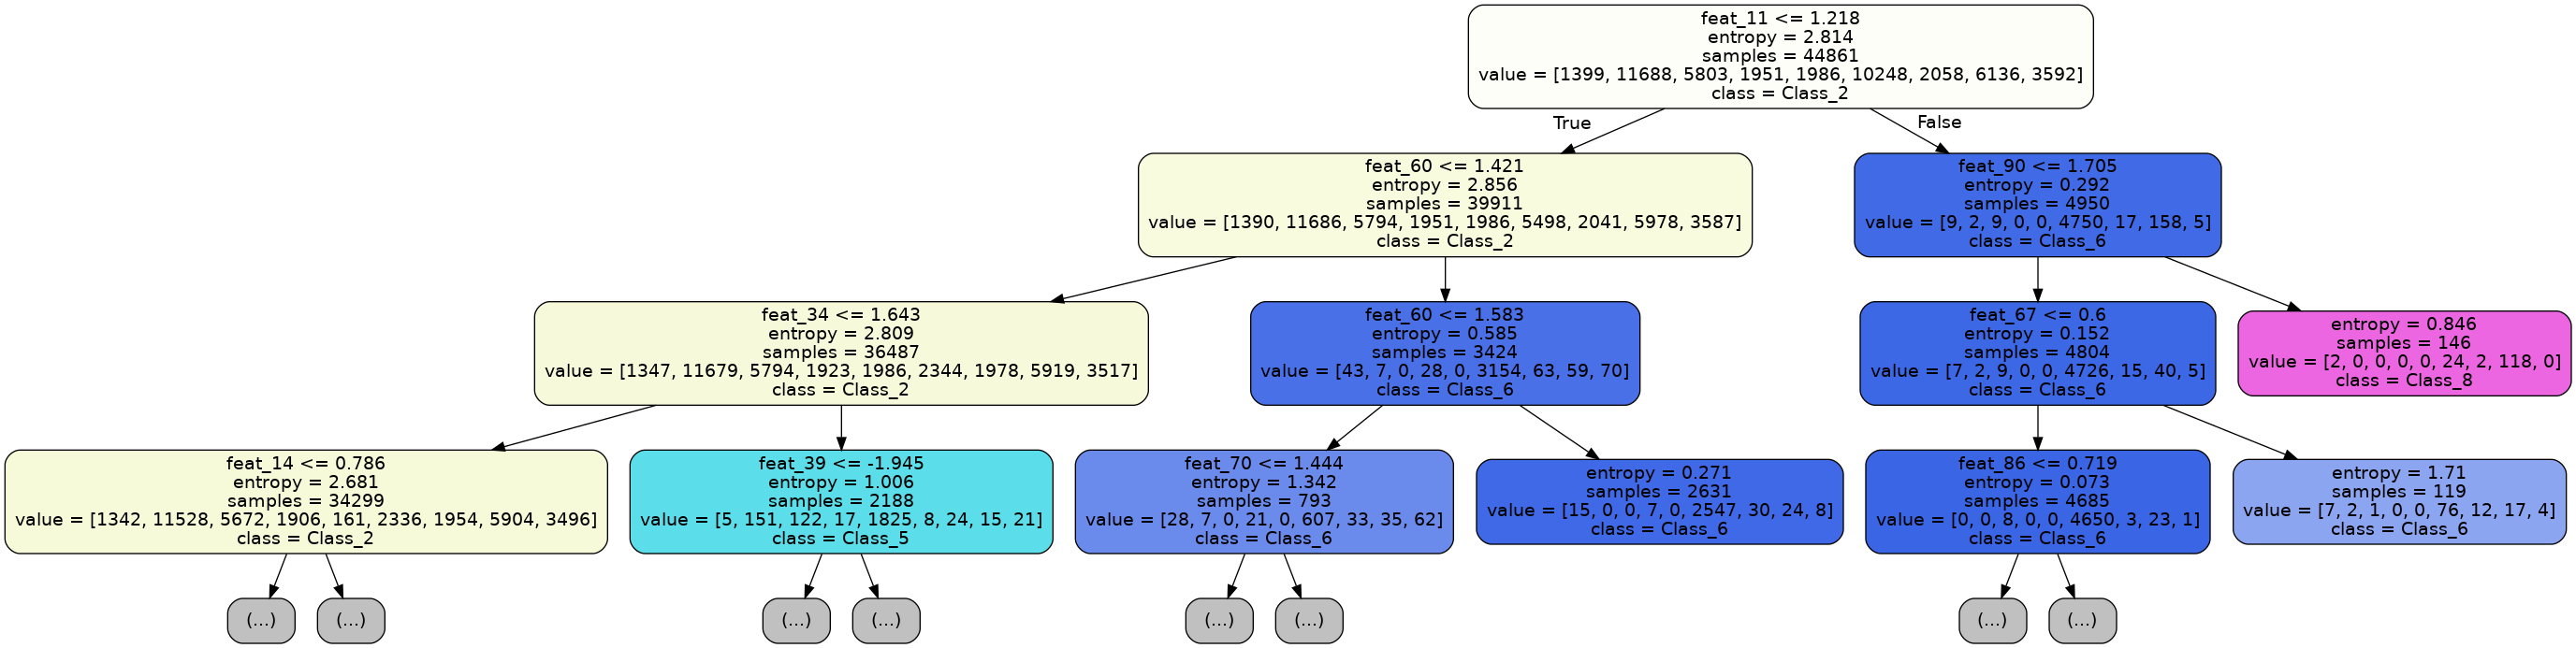

In [25]:
# Export our trained model as a .dot file
with open("otto.dot", 'w') as f:
     f = tree.export_graphviz(dtree, out_file=f, max_depth = 3, impurity = True, 
                              feature_names = train_new.drop(['id', 'target', 'target_ord'], axis = 1).columns.values.tolist(), 
                              class_names = train_new.target.unique().tolist(), 
                              rounded = True, filled = True)
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','otto.dot','-o','otto.png'])

# Annotating chart with PIL
img = Image.open("otto.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

## Using Logistic Regression

From Wikipedia:
> In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(solver = 'saga', warm_start = True,
                        penalty = 'elasticnet', l1_ratio = 0.3,
                        random_state = 5, C = 1, max_iter = 500)
lr.fit(X_train, y_train)

yhat = lr.predict(X_valid)
yhat_lr = lr.predict_proba(X_valid)
logloss_lr = log_loss(y_valid, yhat_lr)
print('Log loss using Logistic Regression:', logloss_lr)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Log loss using Logistic Regression: 0.7567071564094083


Let us use a custom function to plot our confusion matrix.

In [28]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix. Normalization can be applied by setting normalize = True.
    '''
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        fmt = '.2f'
    else:
        fmt = 'd'
    
    thresh = cm.max()/2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[ 158   26    7    1    4   70   14  139  111]
 [   3 3741  469   64   21   26   34   37   39]
 [   0 1326  684   46    5   12   77   35   16]
 [   0  343   92  222    7   39   21    3   13]
 [   0   26    0    0  721    3    0    1    2]
 [  24   52   16   18    7 3470   55  154   91]
 [  20   98   78   22   11  103  353   79   17]
 [  50   52   17    0    5  168   46 1933   57]
 [  54   60    6    3    7   77    6   91 1059]]


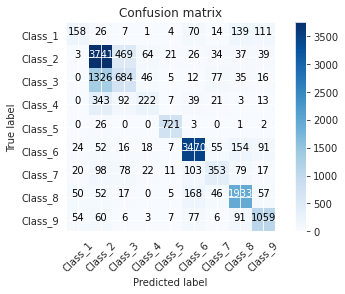

In [29]:
cnf_matrix = confusion_matrix(y_valid, yhat, labels = train_new.target_ord.unique().tolist())
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = train_new.target.unique().tolist())

In [30]:
print('Classification Report:')
print(classification_report(y_valid, yhat))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.30      0.38       530
           1       0.65      0.84      0.74      4434
           2       0.50      0.31      0.38      2201
           3       0.59      0.30      0.40       740
           4       0.91      0.96      0.94       753
           5       0.87      0.89      0.88      3887
           6       0.58      0.45      0.51       781
           7       0.78      0.83      0.81      2328
           8       0.75      0.78      0.77      1363

    accuracy                           0.73     17017
   macro avg       0.68      0.63      0.64     17017
weighted avg       0.71      0.73      0.71     17017



## Using Support Vector Machines

From tutorialspoint:
> An SVM model is a representation of different classes in a hyperplane in multidimensional space. The hyperplane is generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a `maximum margin(al) hyperplane`.

In [35]:
from sklearn import svm

In [ ]:
cnf_matrix = confusion_matrix(y_valid, yhat, labels = train_new.target_ord.unique().tolist())

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = train_new.target.unique().tolist())

In [37]:
print('Classification Report:')
print(classification_report(y_valid, yhat))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.30      0.38       530
           1       0.65      0.84      0.74      4434
           2       0.50      0.31      0.38      2201
           3       0.59      0.30      0.40       740
           4       0.91      0.96      0.94       753
           5       0.87      0.89      0.88      3887
           6       0.58      0.45      0.51       781
           7       0.78      0.83      0.81      2328
           8       0.75      0.78      0.77      1363

    accuracy                           0.73     17017
   macro avg       0.68      0.63      0.64     17017
weighted avg       0.71      0.73      0.71     17017



## Using XGBoostClassifier

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb_params = {'n_estimators': 2500,
             'max_depth': 5,
             'learning_rate': 0.01,
             'min_child_weight': 4,
             'colsample_bytree': 0.4,
             'subsample': 0.4,
             'reg_alpha': 0.6,
             'reg_lambda': 0.6
             }
xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train, early_stopping_rounds = 5,
       eval_set = [(X_train, y_train), (X_valid, y_valid)],
       verbose = False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:26:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=2500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.6,
              reg_lambda=0.6, scale_pos_weight=None, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
#To calculate log-loss, we need the probability of each prediction
yhat_xgbc = xgb.predict_proba(X_valid)
logloss_XGBC = log_loss(y_valid, yhat_xgbc)
print("Log loss using XGB Classifier:", logloss_XGBC)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Log loss using XGB Classifier: 0.5138227791530505


### Using the XGBoost Feature Importance Plot

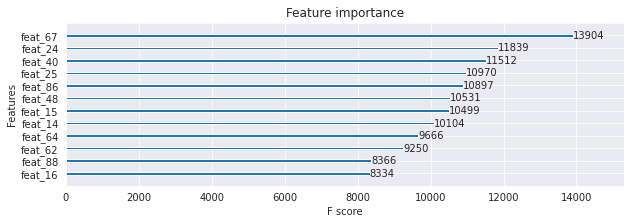

In [41]:
from xgboost import plot_importance
# Plot feature importance
ax = plot_importance(xgb, max_num_features=12, show_values=True) 
fig = ax.figure
fig.set_size_inches(10, 3)
plt.show()

In [42]:
results = xgb.evals_result()

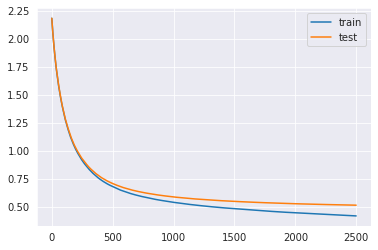

In [43]:
# Plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
plt.legend()
plt.show()

## Using AdaBoostClassifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
abc = AdaBoostClassifier(n_estimators = 1000, random_state = 0, learning_rate = 0.12)
abc.fit(X_train, y_train)

yhat_ABC = abc.predict_proba(X_valid)
logloss_ABC = log_loss(y_valid, yhat_ABC)
print('Log loss using Ada Boost Classifier:', logloss_ABC)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Log loss using Ada Boost Classifier: 2.1159445210915195


## Using CatBoostClassifier

The following parameters have been set by trial and error from [Parameter tuning](https://catboost.ai/docs/concepts/parameter-tuning.html) and [Speeding up training](https://catboost.ai/docs/concepts/speed-up-training.html).

In [49]:
from catboost import CatBoostClassifier

In [50]:
CBC_params = {
                'iterations': 5000, 
                'od_wait': 250,
                'use_best_model': True,
                'loss_function': 'MultiClass',
                'eval_metric': 'MultiClass',
                'leaf_estimation_method': 'Newton',
                'bootstrap_type': 'Bernoulli',
                'subsample': 0.4,
                'learning_rate': 0.05,
                'l2_leaf_reg': 0.5, #L2 Regularization
                'random_strength': 10, #amount of randomness to use for scoring splits when tree structure is selected
                'depth': 6, #Tree depth
                'min_data_in_leaf': 3, #minimum number of training samples in a leaf
                'leaf_estimation_iterations': 4, #Earlier = 7
                'task_type': 'GPU',
                'border_count': 128, #Number of splits for numerical features
                'grow_policy': 'SymmetricTree'
            }